In [89]:
import common
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from chapp.sim import BasebandSpectrumMaker, thermal_noise, baseband_axion_lab, sine
from chapp.physics import get_dist_labframe, get_dist_restframe
from chapp import kernel_from_bins, correlate

mpl.rcParams['font.size'] = 16
mpl.rcParams['figure.figsize'] = (12,6)
mpl.rcParams['axes.formatter.use_mathtext'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['axes.formatter.limits'] = (-3,3)  # scilimits

0.9363446209927342


Text(0,0.5,'Power [W]')

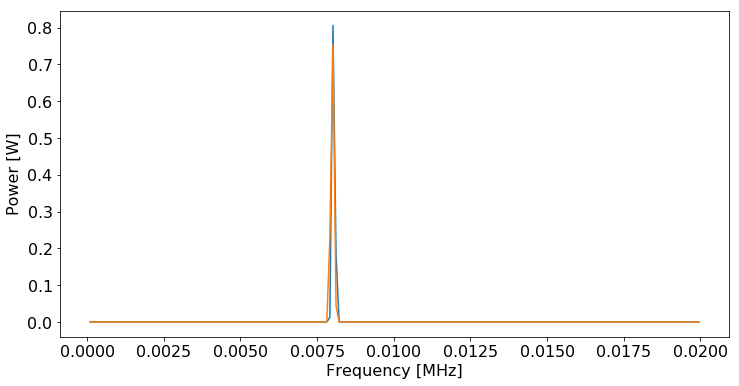

In [201]:
sm = BasebandSpectrumMaker.fsvlike(span=20e3+55, sweep_points=200)
sm.input = sine(amplitude=np.sqrt(2*50), frequency=8e3, phase=np.pi)

sm.knobs.sweep_points = 200

sm.detector = 'Sample'
f, s_sample = sm.generate()
samplemax = s_sample.max()
sm.detector = 'RMS'
f, s_rms = sm.generate()
rmsmax = s_rms.max()

print(rmsmax/samplemax)
fig, ax = plt.subplots()
ax.plot(f/1e6, s_sample, label='Sample')
ax.plot(f/1e6, s_rms, label='RMS')
ax.set_xlabel("Frequency [MHz]")
ax.set_ylabel("Power [W]")